In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv",index_col=1,parse_dates=True)
df.head(2)

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
Date,,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [3]:
#Sort index to be sure that dates are increasing, change data sequence to monthly basis,check if index is correct
df=df.sort_index(ascending=True)
df=df.resample('M').sum()
df.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [8]:
#Define asize
plt.rcParams["figure.figsize"] = (12, 8)

In [9]:
#Checking missing values
df.isnull().sum()

ID                    0
Invoice Number        0
Product Code          0
Customer Code         0
QTY                   0
Total Price           0
Total Price per 10    0
dtype: int64

In [10]:
#Create normalize value
df["Total Price per 10"]=df["Total Price"]/10

<AxesSubplot:xlabel='Date'>

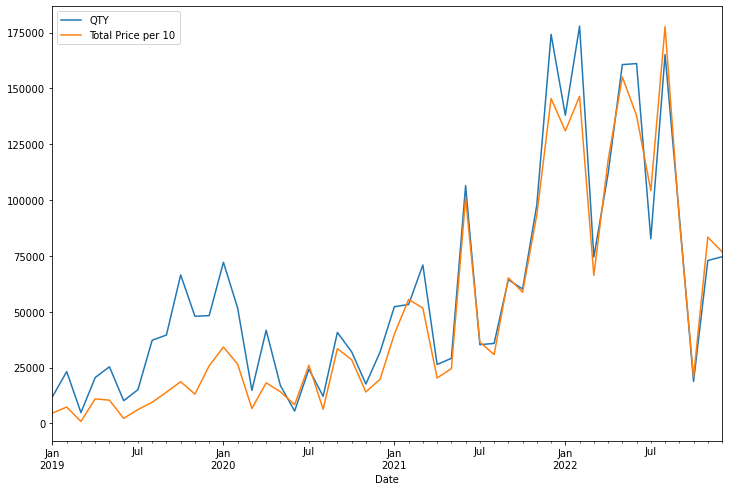

In [11]:
#Selection needed columns and plot time series data
df_ts = df[["QTY","Total Price per 10"]]
df_ts.plot()

In [12]:
#splitting data for train and test 
train_data = df_ts[:'2022-02-28']
test_data = df_ts['2022-02-28':]

In [21]:
#Create a VARMAX model
model = VARMAX(df_ts, order=(3,18)).fit(disp=False)
result1 = model.forecast(steps = 12)

C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\piotr\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


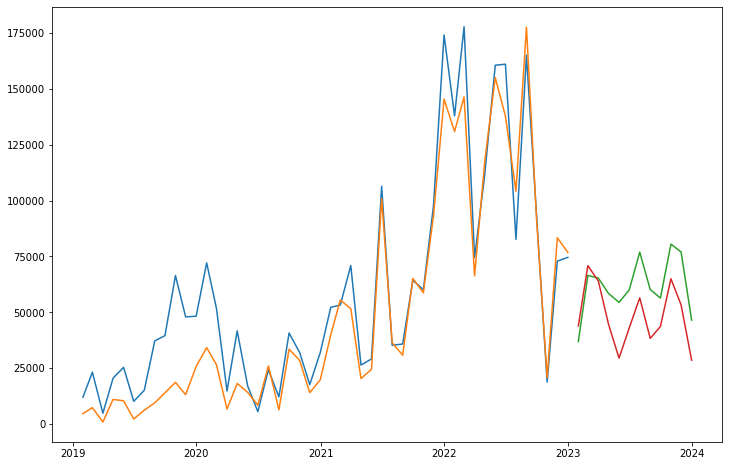

In [22]:
#Plot real and forecasted data
plt.plot(df_ts,label="Real data")
plt.plot(result1,label="Predicted")

In [50]:
#Create a VAR with AR = 0
model = VARMAX(df_ts, order=(1,0)).fit(disp=False)
result2 = model.forecast(steps = 12)

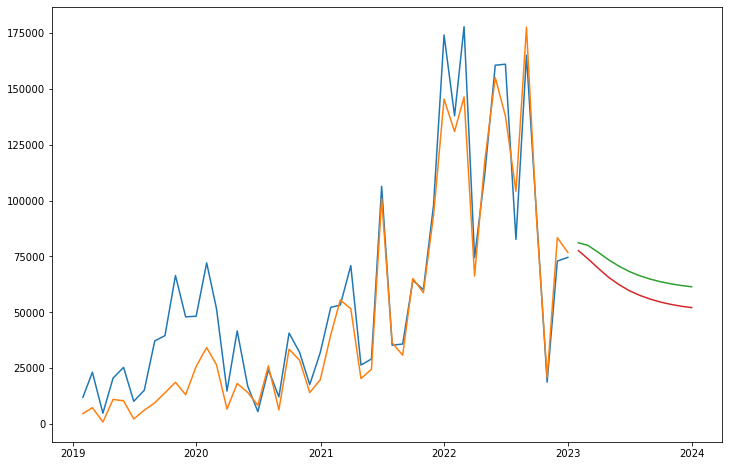

In [51]:
#Plot real and forecasted data
plt.plot(df_ts,label="Real data")
plt.plot(result2,label="Predicted")